In [1]:
import os, sys

In [22]:
cpyt_directory = "C:\\Users\\kduffy\\OneDrive\\Education\\University\\03_PhD\\CC_Work\\cpyt\\"
sys.path.insert(1, cpyt_directory)

In [24]:
from cpyt.processing.read_cpt import CPT

In [25]:
example_directory = "C:\\Users\\kduffy\\OneDrive\\Education\\University\\03_PhD\\CC_Work\\cpyt\\samples\\"
gef_file = "CPT000000148750_IMBRO_A.gef"

In [26]:
cpt = CPT()

In [27]:
cpt.qc

[]

ValueError: x and y must have same first dimension, but have shapes (711,) and (71100000,)

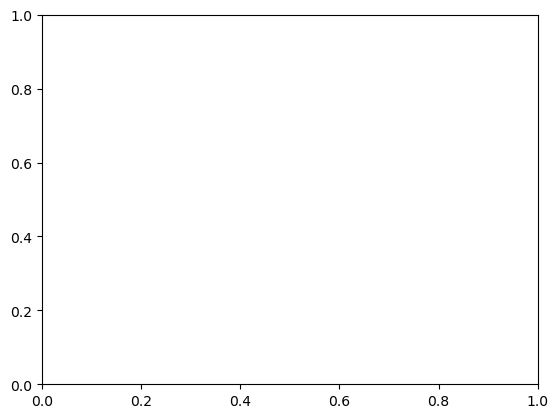

In [38]:
import matplotlib.pyplot as plt
def multiply_and_plot(multiplier,CPT):
    CPT.qc = CPT.qc*multiplier
    plt.plot(CPT.pen,CPT.qc)
    
multiply_and_plot(multiplier=10,CPT=cpt)

In [28]:
cpt.readGEF(example_directory + gef_file)

==  CPT000000148750_IMBRO_A.gef  =============

Elevations corrected by default elevation in GEF file
Pre-excavation carried out to 0.02m


In [30]:
df = cpt.asDataFrame()

In [31]:
df.head()

,z,qc,fs,Rf,u2,incl_x,incl_y,incl,pen,time
0,2.860,0.325,0.015,4.615385,0.015,0.015,0.325,0.0,0.000,0.0
1,2.785,0.525,0.016,3.047619,0.016,0.016,0.525,0.0,0.075,0.0
2,2.735,0.500,0.015,3.000000,0.015,0.015,0.500,0.0,0.125,0.0
3,2.685,0.450,0.001,0.222222,0.001,0.001,0.450,0.0,0.175,0.0
4,2.635,0.475,0.001,0.210526,0.001,0.001,0.475,0.0,0.225,0.0


(<Figure size 750x900 with 3 Axes>,
 array([<Axes: xlabel='Cone resistance [MPa]', ylabel='Depth [m]'>,
        <Axes: xlabel='Friction sleeve\nresistance [MPa]'>,
        <Axes: xlabel='Friction ratio [%]'>], dtype=object))

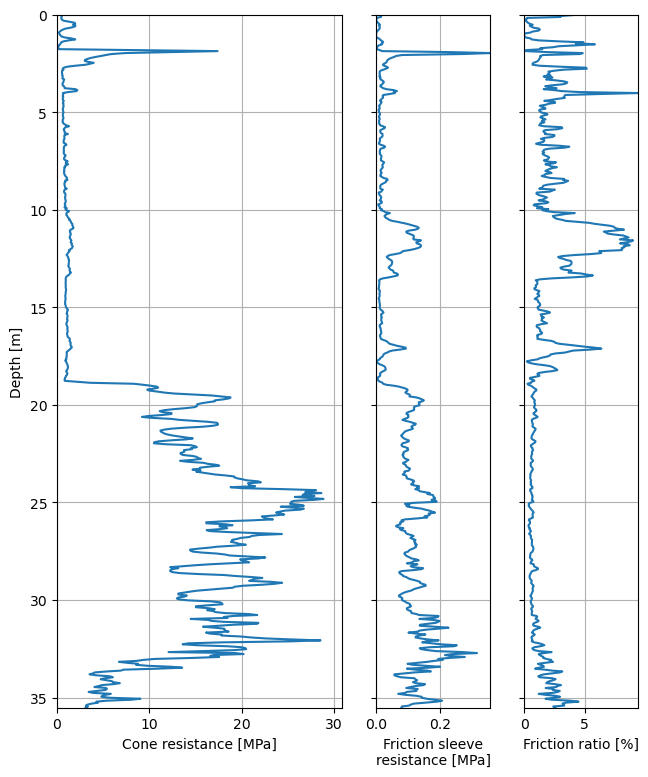

In [32]:
cpt.plot()

In [39]:
from cpyt.interpretation import correlations

In [46]:
df

,z,qc,fs,Rf,u2,incl_x,incl_y,incl,pen,time,qt,gammaSat,sig_eff,sig
0,2.860,0.325,0.015,4.615385,0.015,0.015,0.325,0.0,-0.000,0.0,0.325003,12.983639,NaN,NaN
1,2.785,0.525,0.016,3.047619,0.016,0.016,0.525,0.0,0.075,0.0,0.525003,14.939540,1.120465,1.120465
2,2.735,0.500,0.015,3.000000,0.015,0.015,0.500,0.0,0.125,0.0,0.500003,14.880011,1.864466,1.864466
3,2.685,0.450,0.001,0.222222,0.001,0.001,0.450,0.0,0.175,0.0,0.450000,16.977538,2.713343,2.713343
4,2.635,0.475,0.001,0.210526,0.001,0.001,0.475,0.0,0.225,0.0,0.475000,17.044503,3.565568,3.565568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,-32.450,3.749,0.118,3.147506,0.118,0.118,3.749,4.0,35.310,0.0,3.749024,18.473818,298.793604,642.143604
707,-32.500,3.299,0.108,3.273719,0.108,0.108,3.299,4.0,35.360,0.0,3.299022,18.226665,299.204938,643.054938
708,-32.550,3.124,0.103,3.297055,0.103,0.103,3.124,4.0,35.410,0.0,3.124021,18.122482,299.611062,643.961062
709,-32.600,3.349,0.080,2.388773,0.080,0.080,3.349,4.0,35.460,0.0,3.349016,18.347468,300.028435,644.878435


The net area ratio has not been specified in deriving q_t
---> The default value of 0.8 has been assumed
Default water table (1m below surface) has been used to calculate effective stress


C:\Users\kduffy\OneDrive\Education\University\03_PhD\CC_Work\cpyt\cpyt\interpretation\correlations.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df.Rf == 0].gammaSat = 0
C:\Users\kduffy\OneDrive\Education\University\03_PhD\CC_Work\cpyt\cpyt\interpretation\correlations.py:85: RuntimeWarning: divide by zero encountered in scalar divide
  row.gammaSat = 19-4.12*(np.log10(5/row.qt)/np.log10(30/row.Rf))


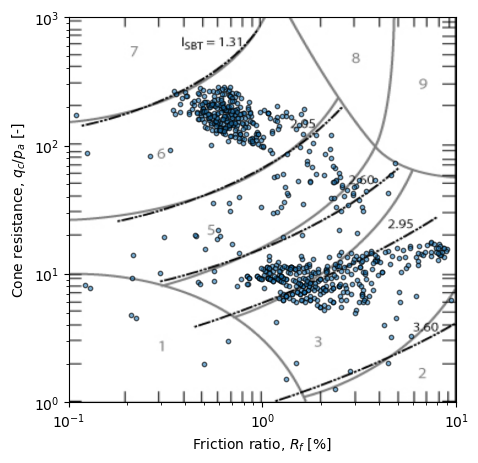

In [49]:
df = correlations.qt(df, a=None)
df = correlations.gammaSat(df,which="lengkeek et al_2018")
df = correlations.sig_eff(df, water_table=1,sea_level=False)
df = correlations.Isbt(df,plot=True,chart="robertson_1990_nonnormalised")

In [48]:
df

,z,qc,fs,Rf,u2,incl_x,incl_y,incl,pen,time,qt,gammaSat,sig_eff,sig
0,2.860,0.325,0.015,4.615385,0.015,0.015,0.325,0.0,-0.000,0.0,0.325003,12.983639,NaN,NaN
1,2.785,0.525,0.016,3.047619,0.016,0.016,0.525,0.0,0.075,0.0,0.525003,14.939540,1.120465,1.120465
2,2.735,0.500,0.015,3.000000,0.015,0.015,0.500,0.0,0.125,0.0,0.500003,14.880011,1.864466,1.864466
3,2.685,0.450,0.001,0.222222,0.001,0.001,0.450,0.0,0.175,0.0,0.450000,16.977538,2.713343,2.713343
4,2.635,0.475,0.001,0.210526,0.001,0.001,0.475,0.0,0.225,0.0,0.475000,17.044503,3.565568,3.565568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,-32.450,3.749,0.118,3.147506,0.118,0.118,3.749,4.0,35.310,0.0,3.749024,18.473818,298.793604,642.143604
707,-32.500,3.299,0.108,3.273719,0.108,0.108,3.299,4.0,35.360,0.0,3.299022,18.226665,299.204938,643.054938
708,-32.550,3.124,0.103,3.297055,0.103,0.103,3.124,4.0,35.410,0.0,3.124021,18.122482,299.611062,643.961062
709,-32.600,3.349,0.080,2.388773,0.080,0.080,3.349,4.0,35.460,0.0,3.349016,18.347468,300.028435,644.878435


In [11]:
from cpyt.processing.read_cpt import CPT

In [20]:
cpt = CPT()
cpt.readGEF(example_directory+gef_file)

==  CPT000000148750_IMBRO_A.gef  =============

Elevations corrected by default elevation in GEF file
Pre-excavation carried out to 0.02m


In [21]:
cpt.qc

[0.325,
 0.525,
 0.5,
 0.45,
 0.475,
 0.55,
 0.775,
 1.4,
 1.925,
 1.975,
 1.725,
 2.0,
 1.875,
 1.45,
 0.9,
 0.625,
 0.425,
 0.3,
 0.2,
 0.25,
 0.3,
 0.375,
 0.5,
 0.825,
 1.575,
 1.975,
 1.25,
 0.7,
 0.451,
 0.401,
 0.326,
 0.201,
 0.176,
 0.126,
 0.151,
 0.201,
 8.788,
 17.376,
 12.151,
 7.376,
 5.901,
 5.276,
 4.751,
 4.151,
 3.651,
 3.301,
 3.026,
 3.001,
 3.351,
 3.976,
 3.551,
 3.076,
 1.951,
 1.101,
 0.726,
 0.601,
 0.702,
 0.552,
 0.552,
 0.527,
 0.552,
 0.577,
 0.552,
 0.627,
 0.602,
 0.577,
 0.777,
 0.727,
 0.702,
 0.677,
 0.602,
 0.602,
 0.602,
 0.752,
 0.802,
 0.827,
 2.002,
 2.202,
 2.102,
 1.202,
 0.627,
 0.677,
 0.652,
 0.602,
 0.677,
 0.628,
 0.628,
 0.628,
 0.728,
 0.678,
 0.628,
 0.703,
 0.678,
 0.703,
 0.703,
 0.653,
 0.628,
 0.628,
 0.653,
 0.678,
 0.703,
 0.653,
 0.628,
 0.628,
 0.653,
 0.678,
 0.703,
 0.628,
 0.603,
 0.628,
 0.603,
 0.678,
 0.828,
 0.979,
 1.304,
 0.904,
 0.829,
 0.729,
 0.754,
 0.829,
 0.804,
 0.854,
 1.179,
 0.804,
 0.804,
 0.779,
 0.804,
 0.80